In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
columns = ['ID',
             'Subscription_Length',
             'Voice_Mailbox_Usage',
             'Early_Call_Length',
             'Early_Calls_Freq',
             'Early_Call_Fee',
             'Late_Call_Length',
             'Late_Calls_Freq',
             'Late_Call_Fee',
             'Night_Call_Length',
             'Night_Calls_Freq',
             'Night_Call_Fee',
             'Counseling_Calls',
             'Cancellation_Status']
train.columns = columns
test.columns = columns[:13]
train

,ID,Subscription_Length,Voice_Mailbox_Usage,Early_Call_Length,Early_Calls_Freq,Early_Call_Fee,Late_Call_Length,Late_Calls_Freq,Late_Call_Fee,Night_Call_Length,Night_Calls_Freq,Night_Call_Fee,Counseling_Calls,Cancellation_Status
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [3]:
# main_time = []
# for i in train.loc[:,['Early_Call_Length','Late_Call_Length','Night_Call_Length']].values:
#     i = list(i)
#     main_time.append(i.index(max(i)))
# train['main_time'] = main_time    

# main_time = []
# for i in test.loc[:,['Early_Call_Length','Late_Call_Length','Night_Call_Length']].values:
#     i = list(i)
#     main_time.append(i.index(max(i)))
# test['main_time'] = main_time    


In [4]:
train.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_9064\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Subscription_Length,Voice_Mailbox_Usage,Early_Call_Length,Early_Calls_Freq,Early_Call_Fee,Late_Call_Length,Late_Calls_Freq,Late_Call_Fee,Night_Call_Length,Night_Calls_Freq,Night_Call_Fee,Counseling_Calls,Cancellation_Status
Subscription_Length,1.000000,0.069771,0.190535,0.128138,0.118500,0.223365,0.119532,0.208486,0.256722,0.111628,0.064803,0.073547,0.006688
Voice_Mailbox_Usage,0.069771,1.000000,0.045449,0.031312,0.070361,0.067955,0.039927,0.065085,0.068964,0.052887,0.025955,0.010326,-0.062734
Early_Call_Length,0.190535,0.045449,1.000000,0.213815,0.336852,0.493299,0.239448,0.483473,0.508642,0.238676,0.177415,0.158215,0.029975
Early_Calls_Freq,0.128138,0.031312,0.213815,1.000000,0.100227,0.265814,0.147605,0.247990,0.289059,0.109052,0.102214,0.072544,0.010974
Early_Call_Fee,0.118500,0.070361,0.336852,0.100227,1.000000,0.219930,0.098014,0.216840,0.219115,0.126778,0.075288,0.102932,-0.071006
Late_Call_Length,0.223365,0.067955,0.493299,0.265814,0.219930,1.000000,0.280098,0.806827,0.605980,0.276678,0.210535,0.189158,-0.000163
Late_Calls_Freq,0.119532,0.039927,0.239448,0.147605,0.098014,0.280098,1.000000,0.278620,0.277744,0.135633,0.094207,0.080626,-0.004276
Late_Call_Fee,0.208486,0.065085,0.483473,0.247990,0.216840,0.806827,0.278620,1.000000,0.580330,0.272802,0.204482,0.189227,0.001711
Night_Call_Length,0.256722,0.068964,0.508642,0.289059,0.219115,0.605980,0.277744,0.580330,1.000000,0.286981,0.305315,0.191133,-0.002872
Night_Calls_Freq,0.111628,0.052887,0.238676,0.109052,0.126778,0.276678,0.135633,0.272802,0.286981,1.000000,0.083941,0.083491,-0.003121


In [25]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

# parms = {'iterations': 2000,
#  #'od_wait': 2182,
#  'learning_rate': 0.005,
#  #'reg_lambda': 2.3132945175291226,
#  #'subsample': 0.01621008882000844,
#  #'random_strength': 25.292157882359646,
#  'depth': 5,
#  'min_data_in_leaf': 5,
#  #'leaf_estimation_iterations': 3,
#  'bagging_temperature': 0.01080117689593031,
#  'colsample_bylevel': 0.7579360851684404}

target = 'Cancellation_Status'
features = [c for c in train.columns if c not in ['ID', target]]
models = []
val_scores = []

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostClassifier(random_state = 42)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    pred = model.predict(X_val)
    score = f1_score(y_val, pred,average='macro')
    val_scores.append(score)
    
    print(f'ACC on fold {i}: {score:.4f}')
    
print(f'mean ACC across all folds: {np.mean(val_scores):.4f}')





# cat = catboost.CatBoostClassifier(**parms)
# cat.fit(train.drop(['ID','Cancellation_Status'],axis=1),train['Cancellation_Status'])
# pred = cat.predict(test.drop('ID',axis=1))

0it [00:00, ?it/s]C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.071642
0:	learn: 0.6363069	test: 0.6356544	best: 0.6356544 (0)	total: 27.8ms	remaining: 27.8s


1it [00:26, 26.82s/it]

999:	learn: 0.1413659	test: 0.2143061	best: 0.2143061 (999)	total: 26.3s	remaining: 0us

bestTest = 0.2143061113
bestIteration = 999

ACC on fold 0: 0.6371
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6362628	test: 0.6352134	best: 0.6352134 (0)	total: 27ms	remaining: 27s


2it [00:53, 26.85s/it]

999:	learn: 0.1403817	test: 0.2085158	best: 0.2085070 (998)	total: 26.3s	remaining: 0us

bestTest = 0.2085069853
bestIteration = 998

Shrink model to first 999 iterations.
ACC on fold 1: 0.6748


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.071642
0:	learn: 0.6362306	test: 0.6352812	best: 0.6352812 (0)	total: 27.6ms	remaining: 27.6s


3it [01:20, 26.79s/it]

999:	learn: 0.1414267	test: 0.2108425	best: 0.2108256 (998)	total: 26.2s	remaining: 0us

bestTest = 0.21082564
bestIteration = 998

Shrink model to first 999 iterations.
ACC on fold 2: 0.6820
Learning rate set to 0.071642
0:	learn: 0.6357828	test: 0.6367788	best: 0.6367788 (0)	total: 28.2ms	remaining: 28.2s


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
4it [01:47, 26.76s/it]

999:	learn: 0.1385173	test: 0.2263082	best: 0.2262541 (996)	total: 26.2s	remaining: 0us

bestTest = 0.2262540632
bestIteration = 996

Shrink model to first 997 iterations.
ACC on fold 3: 0.6595


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.071642
0:	learn: 0.6356982	test: 0.6367695	best: 0.6367695 (0)	total: 27.5ms	remaining: 27.5s


5it [02:13, 26.67s/it]

999:	learn: 0.1394437	test: 0.2224527	best: 0.2224527 (999)	total: 26.1s	remaining: 0us

bestTest = 0.2224526806
bestIteration = 999

ACC on fold 4: 0.6703
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6354869	test: 0.6375379	best: 0.6375379 (0)	total: 28.6ms	remaining: 28.6s


6it [02:40, 26.64s/it]

999:	learn: 0.1402379	test: 0.2300615	best: 0.2300615 (999)	total: 26.1s	remaining: 0us

bestTest = 0.230061452
bestIteration = 999

ACC on fold 5: 0.6555
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6356029	test: 0.6367959	best: 0.6367959 (0)	total: 28.2ms	remaining: 28.2s


7it [03:06, 26.58s/it]

999:	learn: 0.1406408	test: 0.2273912	best: 0.2273912 (999)	total: 26s	remaining: 0us

bestTest = 0.2273911553
bestIteration = 999

ACC on fold 6: 0.6475
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6360317	test: 0.6361682	best: 0.6361682 (0)	total: 29.3ms	remaining: 29.2s


8it [03:33, 26.56s/it]

999:	learn: 0.1394210	test: 0.2227305	best: 0.2226657 (998)	total: 26s	remaining: 0us

bestTest = 0.2226657343
bestIteration = 998

Shrink model to first 999 iterations.
ACC on fold 7: 0.6430
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6363586	test: 0.6352646	best: 0.6352646 (0)	total: 28.5ms	remaining: 28.4s


9it [04:00, 26.66s/it]

999:	learn: 0.1409250	test: 0.2085992	best: 0.2085992 (999)	total: 26.4s	remaining: 0us

bestTest = 0.2085992227
bestIteration = 999

ACC on fold 8: 0.6583
Learning rate set to 0.071642


C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6359536	test: 0.6360804	best: 0.6360804 (0)	total: 32ms	remaining: 32s


10it [04:27, 26.74s/it]

999:	learn: 0.1398445	test: 0.2182668	best: 0.2182668 (999)	total: 26.7s	remaining: 0us

bestTest = 0.2182668077
bestIteration = 999

ACC on fold 9: 0.6509
mean ACC across all folds: 0.6579


In [31]:
cat_preds = []

for model in models[:10]:
    preds = model.predict_proba(test[features])[:,1]
    cat_preds.append(preds)

C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\User\anaconda3\envs\git_repo\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems

<BarContainer object of 11 artists>

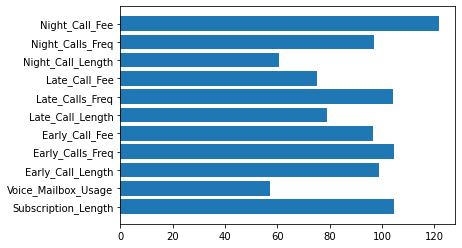

In [26]:
imp = []
for model in models[:10]:
    imp.append(model.feature_importances_)

plt.barh(model.feature_names_,np.array(imp).sum(axis=0))

In [7]:
# train = train.drop('Counseling_Calls',axis=1)
# from pycaret import classification
# classification.setup(data=train,target='Cancellation_Status')

In [8]:
# best = classification.compare_models(sort='ACC',n_select=4,fold=10)

In [67]:
# from lightgbm import LGBMClassifier
# kf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
# val_scores = []

# params = {'scale_pos_weight': 2,
#  #'lambda_l2': 14.705798704172345,
#  'num_leaves': 10,
#  'learning_rate': 0.005,
#  'feature_fraction': 0.8402041342033796,
#  'bagging_fraction': 0.5053012488246705,
#  'bagging_freq': 5,
#  'min_child_samples': 10,
#  'min_data_in_leaf': 10,
#  'max_depth': 10,
#  'random_state' : 42}
# # params = study.best_params

# target = 'Cancellation_Status'
# features = [c for c in train.columns if c not in ['ID', target]]

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = LGBMClassifier(**params)
    
#     model.fit(X_train, y_train)
    
#     models.append(model)
#     pred = model.predict(X_val)
#     score = f1_score(y_val, pred,average='macro')

#     val_scores.append(score)
    
#     print(f'score on fold {i}: {score:.4f}')
    
# print(f'mean score across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


1it [00:00,  2.58it/s]

score on fold 0: 0.4710
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


2it [00:00,  2.76it/s]

score on fold 1: 0.4710
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


3it [00:01,  2.88it/s]

score on fold 2: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


4it [00:01,  2.83it/s]

score on fold 3: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


5it [00:01,  2.70it/s]

score on fold 4: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


6it [00:02,  2.46it/s]

score on fold 5: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


7it [00:02,  2.55it/s]

score on fold 6: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


8it [00:03,  2.65it/s]

score on fold 7: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


9it [00:03,  2.71it/s]

score on fold 8: 0.4709
[LightGBM] [Warning] feature_fraction is set=0.8402041342033796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8402041342033796
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=10 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] bagging_fraction is set=0.5053012488246705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5053012488246705
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


10it [00:03,  2.66it/s]

score on fold 9: 0.4709
mean score across all folds: 0.4709


In [68]:
lgb_preds = []

for model in models[10:]:
    preds = model.predict_proba(test[features])[:,1]
    lgb_preds.append(preds)

(array([289., 133., 273., 553., 520., 418., 435., 873., 786., 723., 595.,
        628., 225., 148., 189., 165., 143., 145., 171., 228., 249., 389.,
        375., 263., 271., 349., 286., 334., 265., 214., 209., 159., 204.,
        217., 194., 256., 277., 149., 116., 122.,  44.,  37.,  62.,  41.,
         91.,   9.,   5.,   9.,   8.,  15.,   7.,  11.,   5.,   5.,   7.,
          2.,   5.,   8.,   2.,   2.,   4.,   4.,   3.,   3.,   3.,   1.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   1.,   2.,
          3.]),
 array([0.09969659, 0.1021247 , 0.1045528 , 0.10698091, 0.10940901,
        0.11183712, 0.11426522, 0.11669333, 0.11912143, 0.12154954,
        0.12397765, 0.12640575, 0.12883386, 0.13126196, 0.13369007,
        0.13611817, 0.13854628, 0.14097438, 0.14340249, 0.14583059,
        0.1482587 , 0.15068681, 0.15311491, 0.

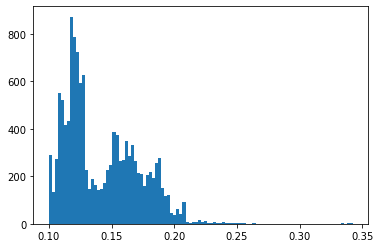

In [74]:
x = np.array(lgb_preds).mean(axis=0)
plt.hist(x,bins=100)

In [87]:
target = []
for i in np.array(cat_preds).mean(axis=0):
    if i < 0.28:
        target.append(0)
    else:
        target.append(1)

In [88]:
sample = pd.read_csv('./sample_submission.csv',index_col='ID')
sample['전화해지여부'] = target
sample.to_csv('./submission.csv')

In [89]:
sample['전화해지여부'].value_counts()


0    11633
1     1310
Name: 전화해지여부, dtype: int64

In [90]:
train['Cancellation_Status'].value_counts()

0    26882
1     3318
Name: Cancellation_Status, dtype: int64